In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [31]:
df = pd.read_csv("data/data.csv",header = 0)
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [32]:
df.shape

(3376, 46)

In [33]:
df.describe(include='all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


# Fonctions

In [34]:
def outliers(df, column, whisker = 1.5, task = "find"):
    """_summary_

    Args:
        df (a padas data frame): _description_
        column (a string): column in which find, remove or round outliers
        whisker (float, optional): _description_. Defaults to 1.5.
        task (str, optional): _description_. Defaults to "find".

    Returns:
        _type_: _description_
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    if "find" in task:
        Fare_outliers = df[(df[column] < Q1 - whisker*IQR) | (df[column] > Q3 + whisker*IQR)]
        return Fare_outliers
    
    if "round" in task:
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
        return df
    
    if "remove" in task:
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,np.nan,np.where(df[column]<lower_whisker,np.nan,df[column]))
        return df
    
    if "mean" in task:
        m = df[column].mean()
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,m,np.where(df[column]<lower_whisker,m,df[column]))
        return df
    
    if "median" in task:
        m = df[column].median()
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,m,np.where(df[column]<lower_whisker,m,df[column]))
        return df

def rangeVector(x):
    return min(x), max(x)

def catFr(df, column):
    if df[column].dtype == "O":
        return df[column].value_counts()/df.shape[0] 
    else:
        print(column + " in df is not an object type" )

def get_dummies_withThershold (df, column, thershold = 0.05):
    if df[column].dtype == "O": # If column is of object type
        series = catFr(df, column) # compute categories frequencies
        series = series[series > thershold].index # find categories frequencies greater than the thershold
        if(len(series) > 0):
            if len(series) == 1:
                print(" In " + column + "Only one categorie")
                return "NA"
            else:  
                df[column] = np.where(~df[column].isin(series.tolist()), "NA",df[column] ) # replace lower categories by NA
                tmp = pd.get_dummies(df[column]) # get dummies
                if "NA" in tmp.columns:
                    tmp.drop("NA", axis = 1, inplace=True) # drop NA
                tmp.columns = column + "_" + tmp.columns
                return tmp # return dummies  
        else:
            print(" In " + column + "all categories are bellow the thershold")
            return "NA"
    else:
        print(column + " in df is not an object type" )
    
def OHEfr_single(df, column, thershold = 0.05):
    """_summary_ 
        Remove a pandas column categories based on a given thershold
    Args:
        df (_type_): a panda data frame
        column (_type_): column name to work on
        thershold (float, optional): _description_. Defaults to 0.05.

    Returns:
        _type_: list of categories that are greateter than the thershold
    """
    if df[column].dtype == "O": # If column is of object type
        tmp = get_dummies_withThershold(df, column, thershold =thershold) # get dummies based on frequencies
        if "NA" in tmp:# If all categories are bellow the thershold return df without the column in question
            df.drop(column, axis = 1, inplace= True)
            return df 
        else:
            tmp = pd.concat([df, tmp], axis= 1) # merge with df
            tmp.drop(column, axis = 1, inplace= True) # drop columns on which dummies based on frequencies have been made
            return tmp
    else:
        return df #  # If column is not of object type return original data frame (to allow iteration on data frame)
        
def OHEfr(df, thershold = 0.05):
    for columns in df:
        df = OHEfr_single(df, columns, thershold= thershold)
    return df

def corrdot(corr_r, size = 10000):
    ax = plt.gca()
    ax.set_axis_off()    
    marker_size = abs(corr_r) * size
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * size + 5
    ax.annotate(corr_r, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
def explorationGridCont(X, y, figsize= (20,30), size = 10, fontsizeY = 10, fontsizeX = 10 ,fontsize = 10):
    import warnings
    matrix = pd.concat([X,y], axis = 1).corr().round(2)    
    matrix = matrix.loc[:,y.name]
    matrix = matrix[matrix.abs().sort_values(ascending=False).index]
    matrix = matrix[matrix != 1]
    
    fig = plt.figure(figsize= figsize)
    fig.suptitle(y.name, fontsize=fontsizeY)
    for feat_idx in range(X.shape[1]):
        if feat_idx == 0:
            id = 0
        else:
            id = feat_idx * 4
            
        ax = fig.add_subplot(X.shape[1], 4, (id+1)) 
        ax.annotate(matrix.index[feat_idx], [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=fontsizeX)
        ax.set(xlabel=None, ylabel=None, xticklabels=[])
        ax.set_axis_off()   
        
        ax = fig.add_subplot(X.shape[1], 4, (id+2)) 
        sn.boxplot(x = X.loc[:,matrix.index[feat_idx]])
        ax.set(xlabel=None,  xticklabels=[], yticklabels=[])
        
        ax = fig.add_subplot(X.shape[1], 4, (id+3)) 
        warnings.simplefilter("ignore")
        sn.regplot(x = X.loc[:,matrix.index[feat_idx]], y = y, lowess=True, ci=False, line_kws={'color': 'black'})
        ax.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
        
        ax = fig.add_subplot(X.shape[1], 4, (id+4)) 
        corrdot(matrix.iloc[feat_idx], size = fontsize)
        
def explorationGridCat(X, y, figsize= (30,50), size = 10, fontsizeY = 10, fontsizeX = 10 ,fontsize = 10):
    import warnings
    fig = plt.figure(figsize= figsize)
    fig.suptitle(y.name, fontsize=50)
    for feat_idx in range(X.shape[1]):
        if feat_idx == 0:
            id = 0
        else:
            id = feat_idx * 1
            
        ax = fig.add_subplot(X.shape[1], 1, (id+1)) 
        sn.boxplot(y=X.iloc[:,feat_idx], x=y)        
        ax.set(xlabel=None, xticklabels=[])


# Nettoyage

## Supression de type de constructions résidentiels

In [35]:
catFr(df, "BuildingType")

NonResidential          0.432464
Multifamily LR (1-4)    0.301540
Multifamily MR (5-9)    0.171801
Multifamily HR (10+)    0.032583
SPS-District K-12       0.029028
Nonresidential COS      0.025178
Campus                  0.007109
Nonresidential WA       0.000296
Name: BuildingType, dtype: float64

In [36]:
df = df[df.BuildingType.isin(['NonResidential', "Nonresidential COS", "Nonresidential WA"])]

## Suppression des colonnes ayant trop de données manquantes

In [37]:
Nnan = df.isna().sum()/df.shape[0]
Nnan

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.010349
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.001294
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.001294
LargestPropertyUseType             0.003881
LargestPropertyUseTypeGFA       

<AxesSubplot: >

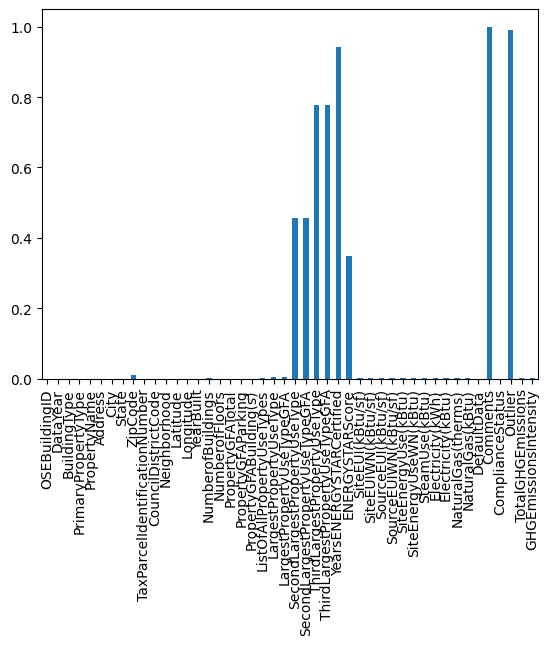

In [38]:
Nnan.plot.bar()

On peut voir que la majorité des colonnes ont des informations complètes. On ne conserve que les colonnes avec un nombre de valeurs manquantes inférieures à la moyenne.

Note, Energy score est enlevé, on le récupèrera plus tard quand on travaillera dessus.

In [39]:
df = df.loc[:,Nnan[Nnan < .99].index]

In [40]:
for columns in df:
    print(str(columns) )
    print( df.loc[:,columns].unique())

OSEBuildingID
[    1     2     3 ... 50224 50225 50226]
DataYear
[2016]
BuildingType
['NonResidential' 'Nonresidential COS' 'Nonresidential WA']
PrimaryPropertyType
['Hotel' 'Other' 'Mixed Use Property' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'K-12 School' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Supermarket / Grocery Store' 'Laboratory'
 'Refrigerated Warehouse' 'Restaurant' 'Low-Rise Multifamily' 'Office']
PropertyName
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
Address
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
City
['Seattle']
State
['WA']
ZipCode
[98101. 98121. 98104. 98154. 98105. 98070. 98118. 98107. 98144. 98103.
 98109. 98119. 98136. 98122. 98126. 98133. 98033. 

In [41]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHG

Pas de duplicata dans les ID des bâtiments

In [42]:
df.OSEBuildingID.duplicated().any()

False

Quelques petits problèmes :

    1. l'année est identique pour tout le monde donc on l'enlève.
    2. PropertyName ne sert à rien on l'enlève.
    3. Address ne sert à rien puisque l'on a les coordonnées géographiques, on l'enlève.
    4. City est identique pour tout le monde donc on l'enlève.
    5. State est identique pour tout le monde donc on l'enlève.
    6. ZipCode n'est pas intéréssant, on l'enlève.
    7. TaxParcelIdentificationNumber n'est pas intéréssant, on l'enlève.
    8. CouncilDistrictCode n’est pas intéréssant, on l'enlève.
    9. Neighborhood n'est pas intéréssant, on l'enlève.
    10.  NumberofBuildings ne peut avoir de zéros.
    11. YearsENERGYSTARCertified sont complètement faussés


In [43]:
df.drop(["OSEBuildingID",
        'CouncilDistrictCode',
         "DataYear",
         "PropertyName",
         'State',
         'City',
         'TaxParcelIdentificationNumber',         
         'Address',
         'YearsENERGYSTARCertified',
         'ZipCode'], inplace = True, axis = 1)
df['NumberofBuildings'] = np.where(df['NumberofBuildings'] == 0, 1, df['NumberofBuildings'] )

## Suppression des lignes contenant trop de valeurs manquantes

c:\Users\SSosa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

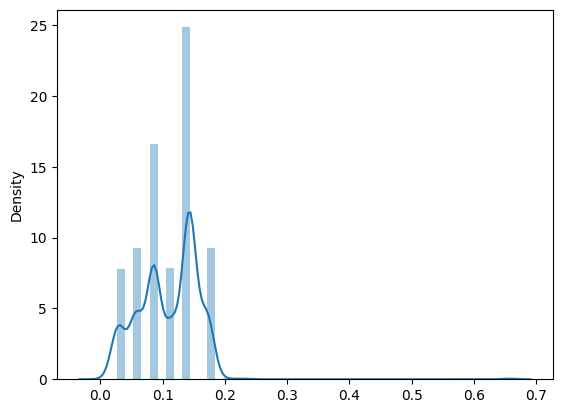

In [44]:
nan = df.isna().sum(axis = 1)/df.shape[1]
nan
sn.distplot(nan)

In [45]:
df = df.filter(items = nan[nan < 0.2].index, axis = 0)

## Suppression des variables de consommation énergétique

In [46]:
df.drop(['Electricity(kWh)', "NaturalGas(therms)", "SiteEUI(kBtu/sf)",	"SiteEUIWN(kBtu/sf)",	"SourceEUI(kBtu/sf)", "GHGEmissionsIntensity",	"SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "NaturalGas(kBtu)","Electricity(kBtu)", "SteamUse(kBtu)"], axis = 1, inplace=True) 

## Tyes de variables restantes

In [47]:
categorical_columns = df.select_dtypes(['category','object']).columns
numerical_columns = df.select_dtypes(['int32','float64', "int64"]).columns

In [48]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'Outlier'],
      dtype='object')

In [49]:
numerical_columns

Index(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

## One hot encoder

Fréquences des labels par colonnes catégorielles

In [50]:
for columns in df:
    print(columns)
    print(catFr(df, columns))

BuildingType
NonResidential        0.944156
Nonresidential COS    0.055195
Nonresidential WA     0.000649
Name: BuildingType, dtype: float64
PrimaryPropertyType
Small- and Mid-Sized Office    0.188312
Other                          0.156494
Warehouse                      0.121429
Large Office                   0.111688
Mixed Use Property             0.070779
Retail Store                   0.059091
Hotel                          0.048701
Worship Facility               0.046104
Distribution Center            0.034416
Supermarket / Grocery Store    0.025974
K-12 School                    0.025325
Medical Office                 0.025325
Self-Storage Facility          0.017532
Residence Hall                 0.013636
Senior Care Community          0.012987
University                     0.011688
Refrigerated Warehouse         0.007792
Hospital                       0.006494
Laboratory                     0.006494
Restaurant                     0.006494
Office                         0.001948

In [51]:
df2 = df
df = OHEfr(df, thershold= 0.05)

 In ThirdLargestPropertyUseTypeall categories are bellow the thershold
 In ComplianceStatusOnly one categorie
 In Outlierall categories are bellow the thershold


In [52]:
df.shape

(1540, 39)

## Exploration des variables Y
### SiteEnergyUseWN

(0.0, 296671744.0)

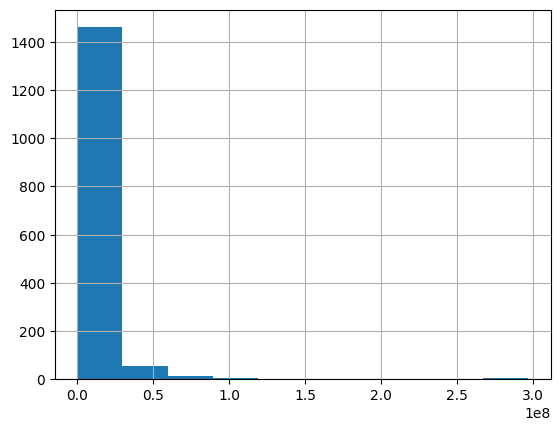

In [53]:
df["SiteEnergyUseWN(kBtu)"].hist()
rangeVector(df["SiteEnergyUseWN(kBtu)"])

Il y a des bâtiments qui consomment zéro, ce qui est impossible.

In [54]:
df["SiteEnergyUseWN(kBtu)"] = np.where(df["SiteEnergyUseWN(kBtu)"] == 0, np.nan, df["SiteEnergyUseWN(kBtu)"])

#### Transformation en log

<AxesSubplot: >

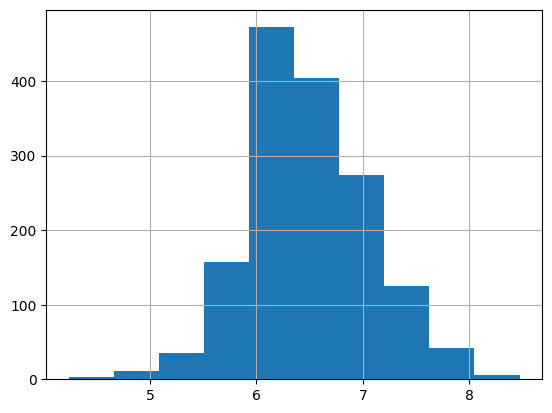

In [55]:
np.log10(df["SiteEnergyUseWN(kBtu)"]).hist()

In [56]:
#df = outliers(df, "SiteEnergyUseWN(kBtu)", task = "remove", whisker= 0.5)

### TotalGHGEmissions

(-0.8, 12307.16)

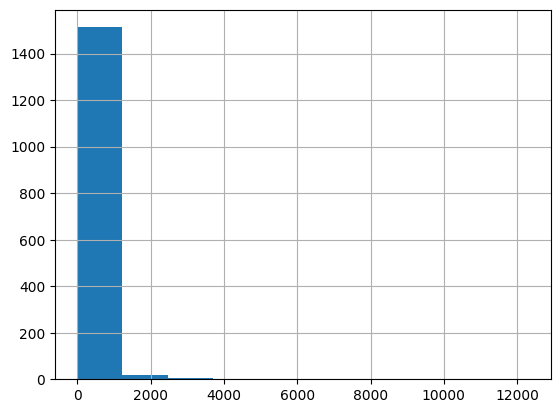

In [57]:
df["TotalGHGEmissions"].hist()
rangeVector(df["TotalGHGEmissions"])

Je ne suis pas sûr que les bâtiments à énergie positive sont présents dans le dataset, on va donc supprimer les valeurs négatives ou égales à zéro.

In [58]:
df["TotalGHGEmissions"] = np.where(df["TotalGHGEmissions"] <= 0, np.nan, df["TotalGHGEmissions"])

### Transformation en log

<AxesSubplot: >

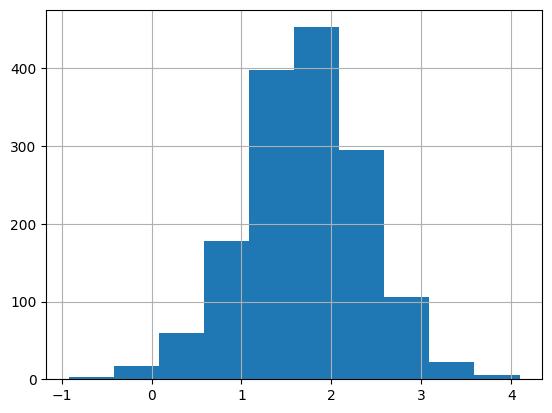

In [59]:
np.log10(df["TotalGHGEmissions"]).hist()

In [60]:
#df = outliers(df, "TotalGHGEmissions", task = "remove", whisker= 0.5)

## Imputation des valeurs manquantes

In [61]:
df = df.dropna(subset=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])
Ys = df.copy()[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]
X = df.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'], axis=1)

In [62]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")
tmp = pd.DataFrame(imputer.fit_transform(X))
tmp.columns = X.columns
X = tmp

### Sauvegarde de l'imputer

In [63]:
import pickle
knnImputer = open("knnImputer", "wb")
pickle.dump(imputer, knnImputer)
knnImputer.close()

## Nouvelles variables

In [64]:
X.NumberofFloors = X.NumberofFloors + 1
X["BuildingAge"] = 2016- X.YearBuilt
X["GFATotal/floors"] = X.PropertyGFATotal / X.NumberofFloors
X["GFATotal/buildings"] = X.PropertyGFATotal / X.NumberofBuildings

## Tableau final

In [73]:
df.shape

(1527, 39)

# Exploration des données

## Corrélation 2 à 2 des variables X

In [65]:
numerical_columns = np.concatenate([numerical_columns, ["BuildingAge", "GFATotal/floors", "GFATotal/buildings"]])
numerical_columns

array(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'BuildingAge',
       'GFATotal/floors', 'GFATotal/buildings'], dtype=object)

<AxesSubplot: >

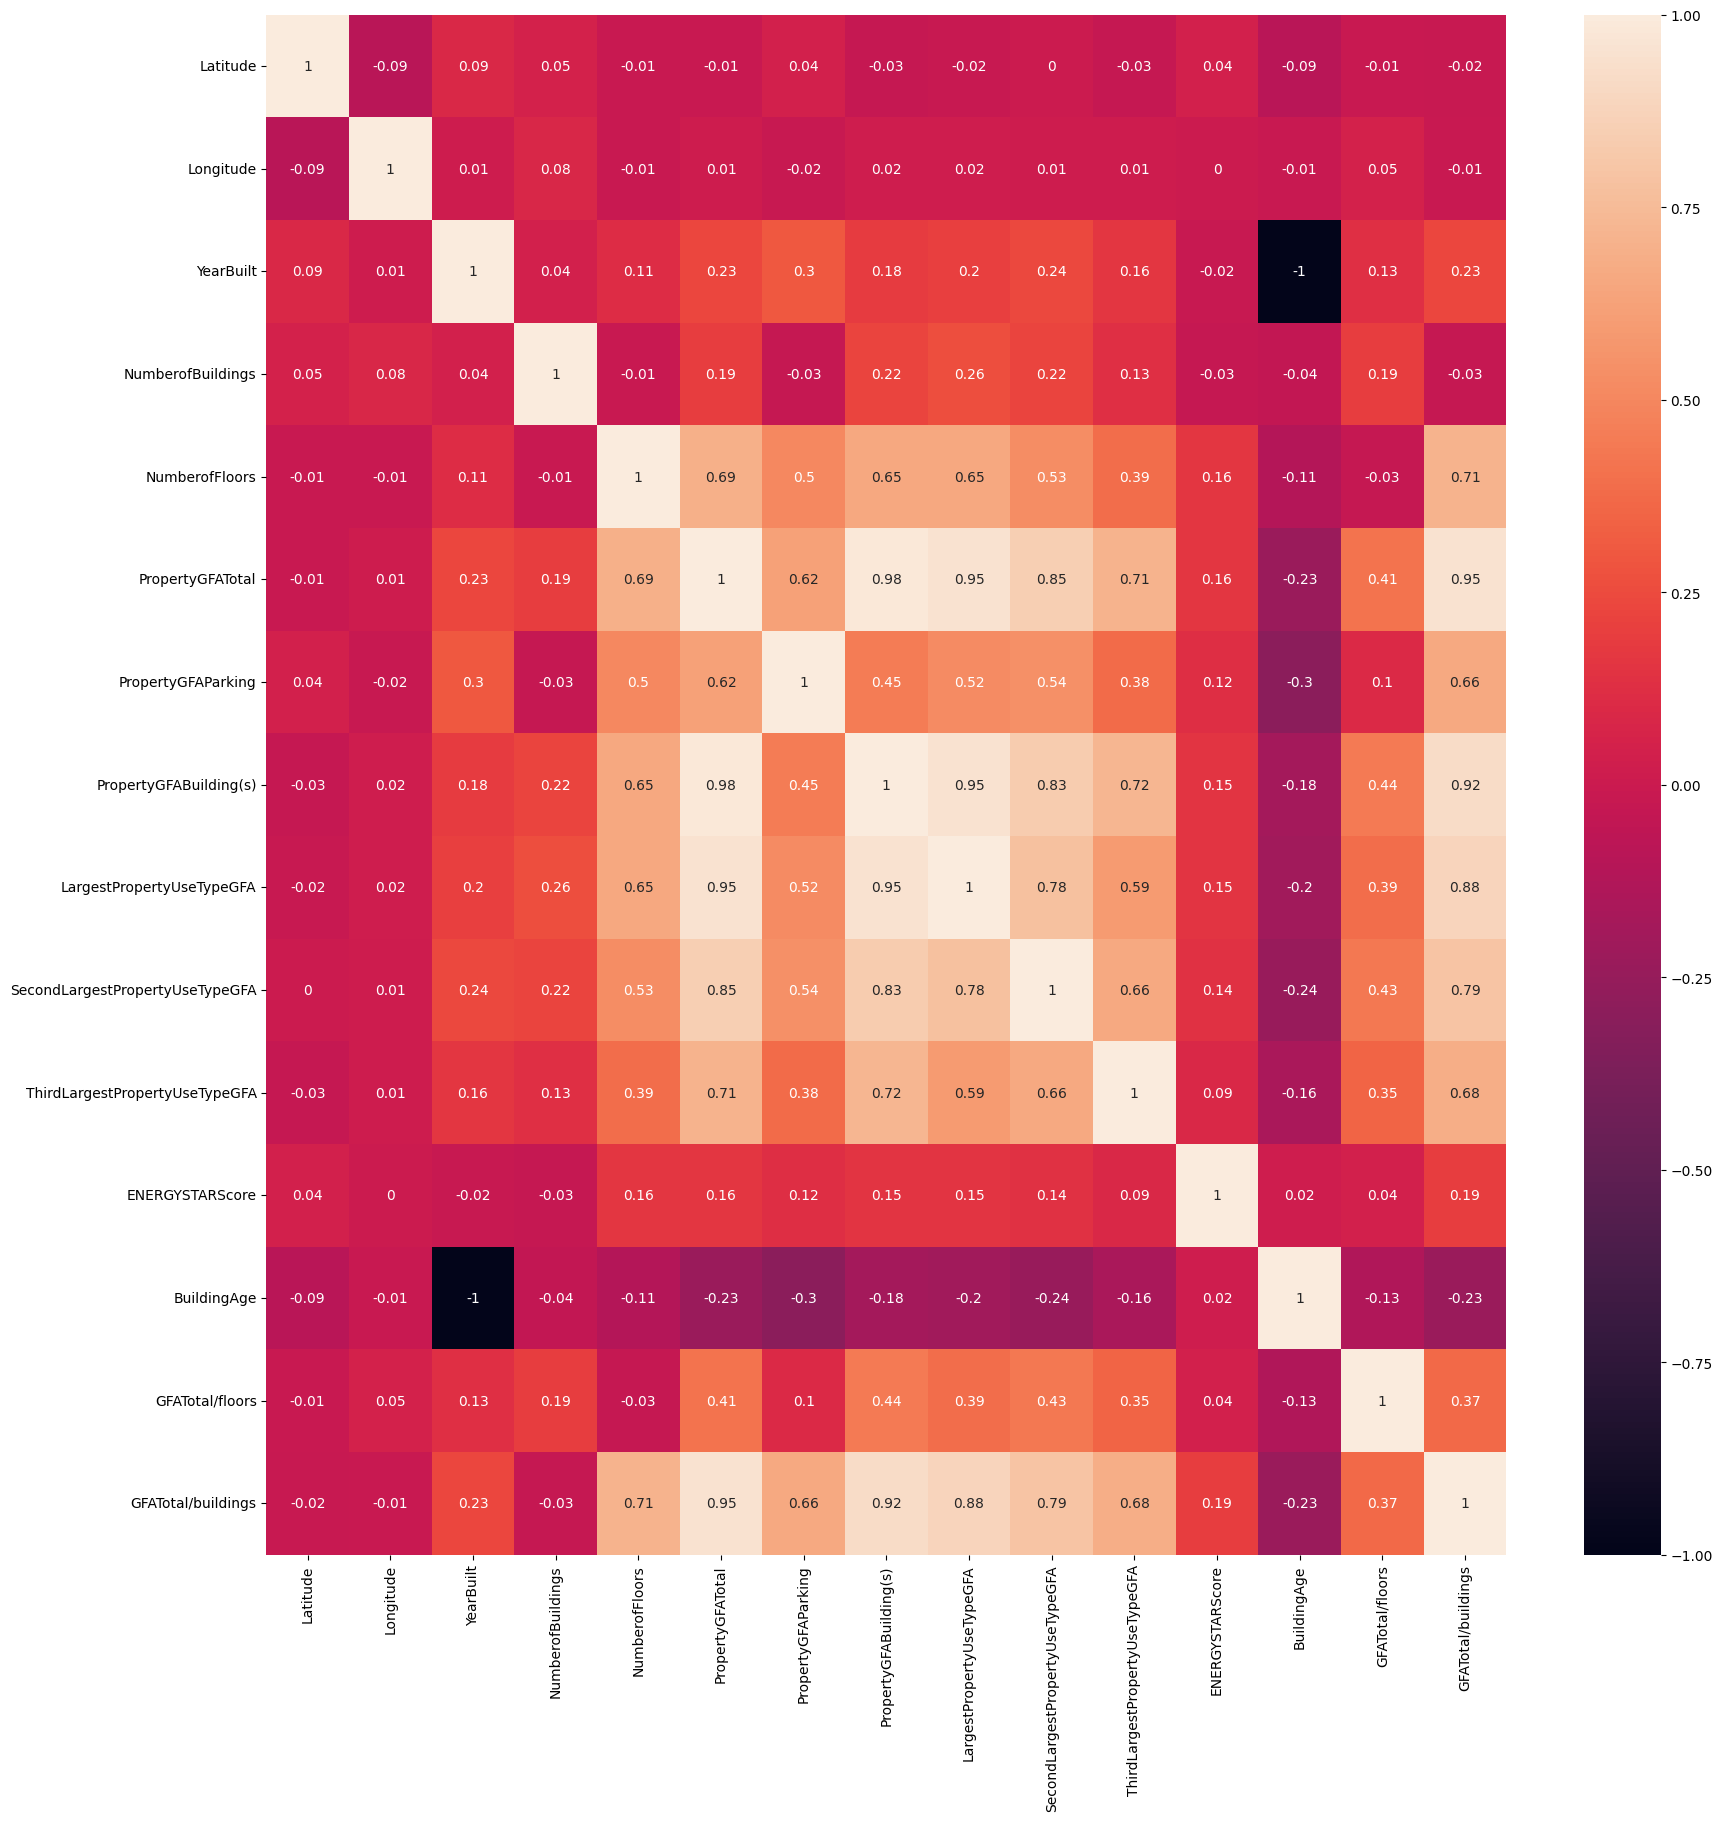

In [66]:
matrix = X.loc[:,X.columns.isin(numerical_columns)].corr().round(2)
plt.figure(figsize=(20,20))
sn.heatmap(matrix, annot=True)

On supprime "YearBuilt" en raison de sa corrélation parfaite entre l'âge du bâtiment et son année de construction.

In [67]:
X.drop("YearBuilt", axis = 1, inplace=True)

## Corrélation Ys et Xs continues

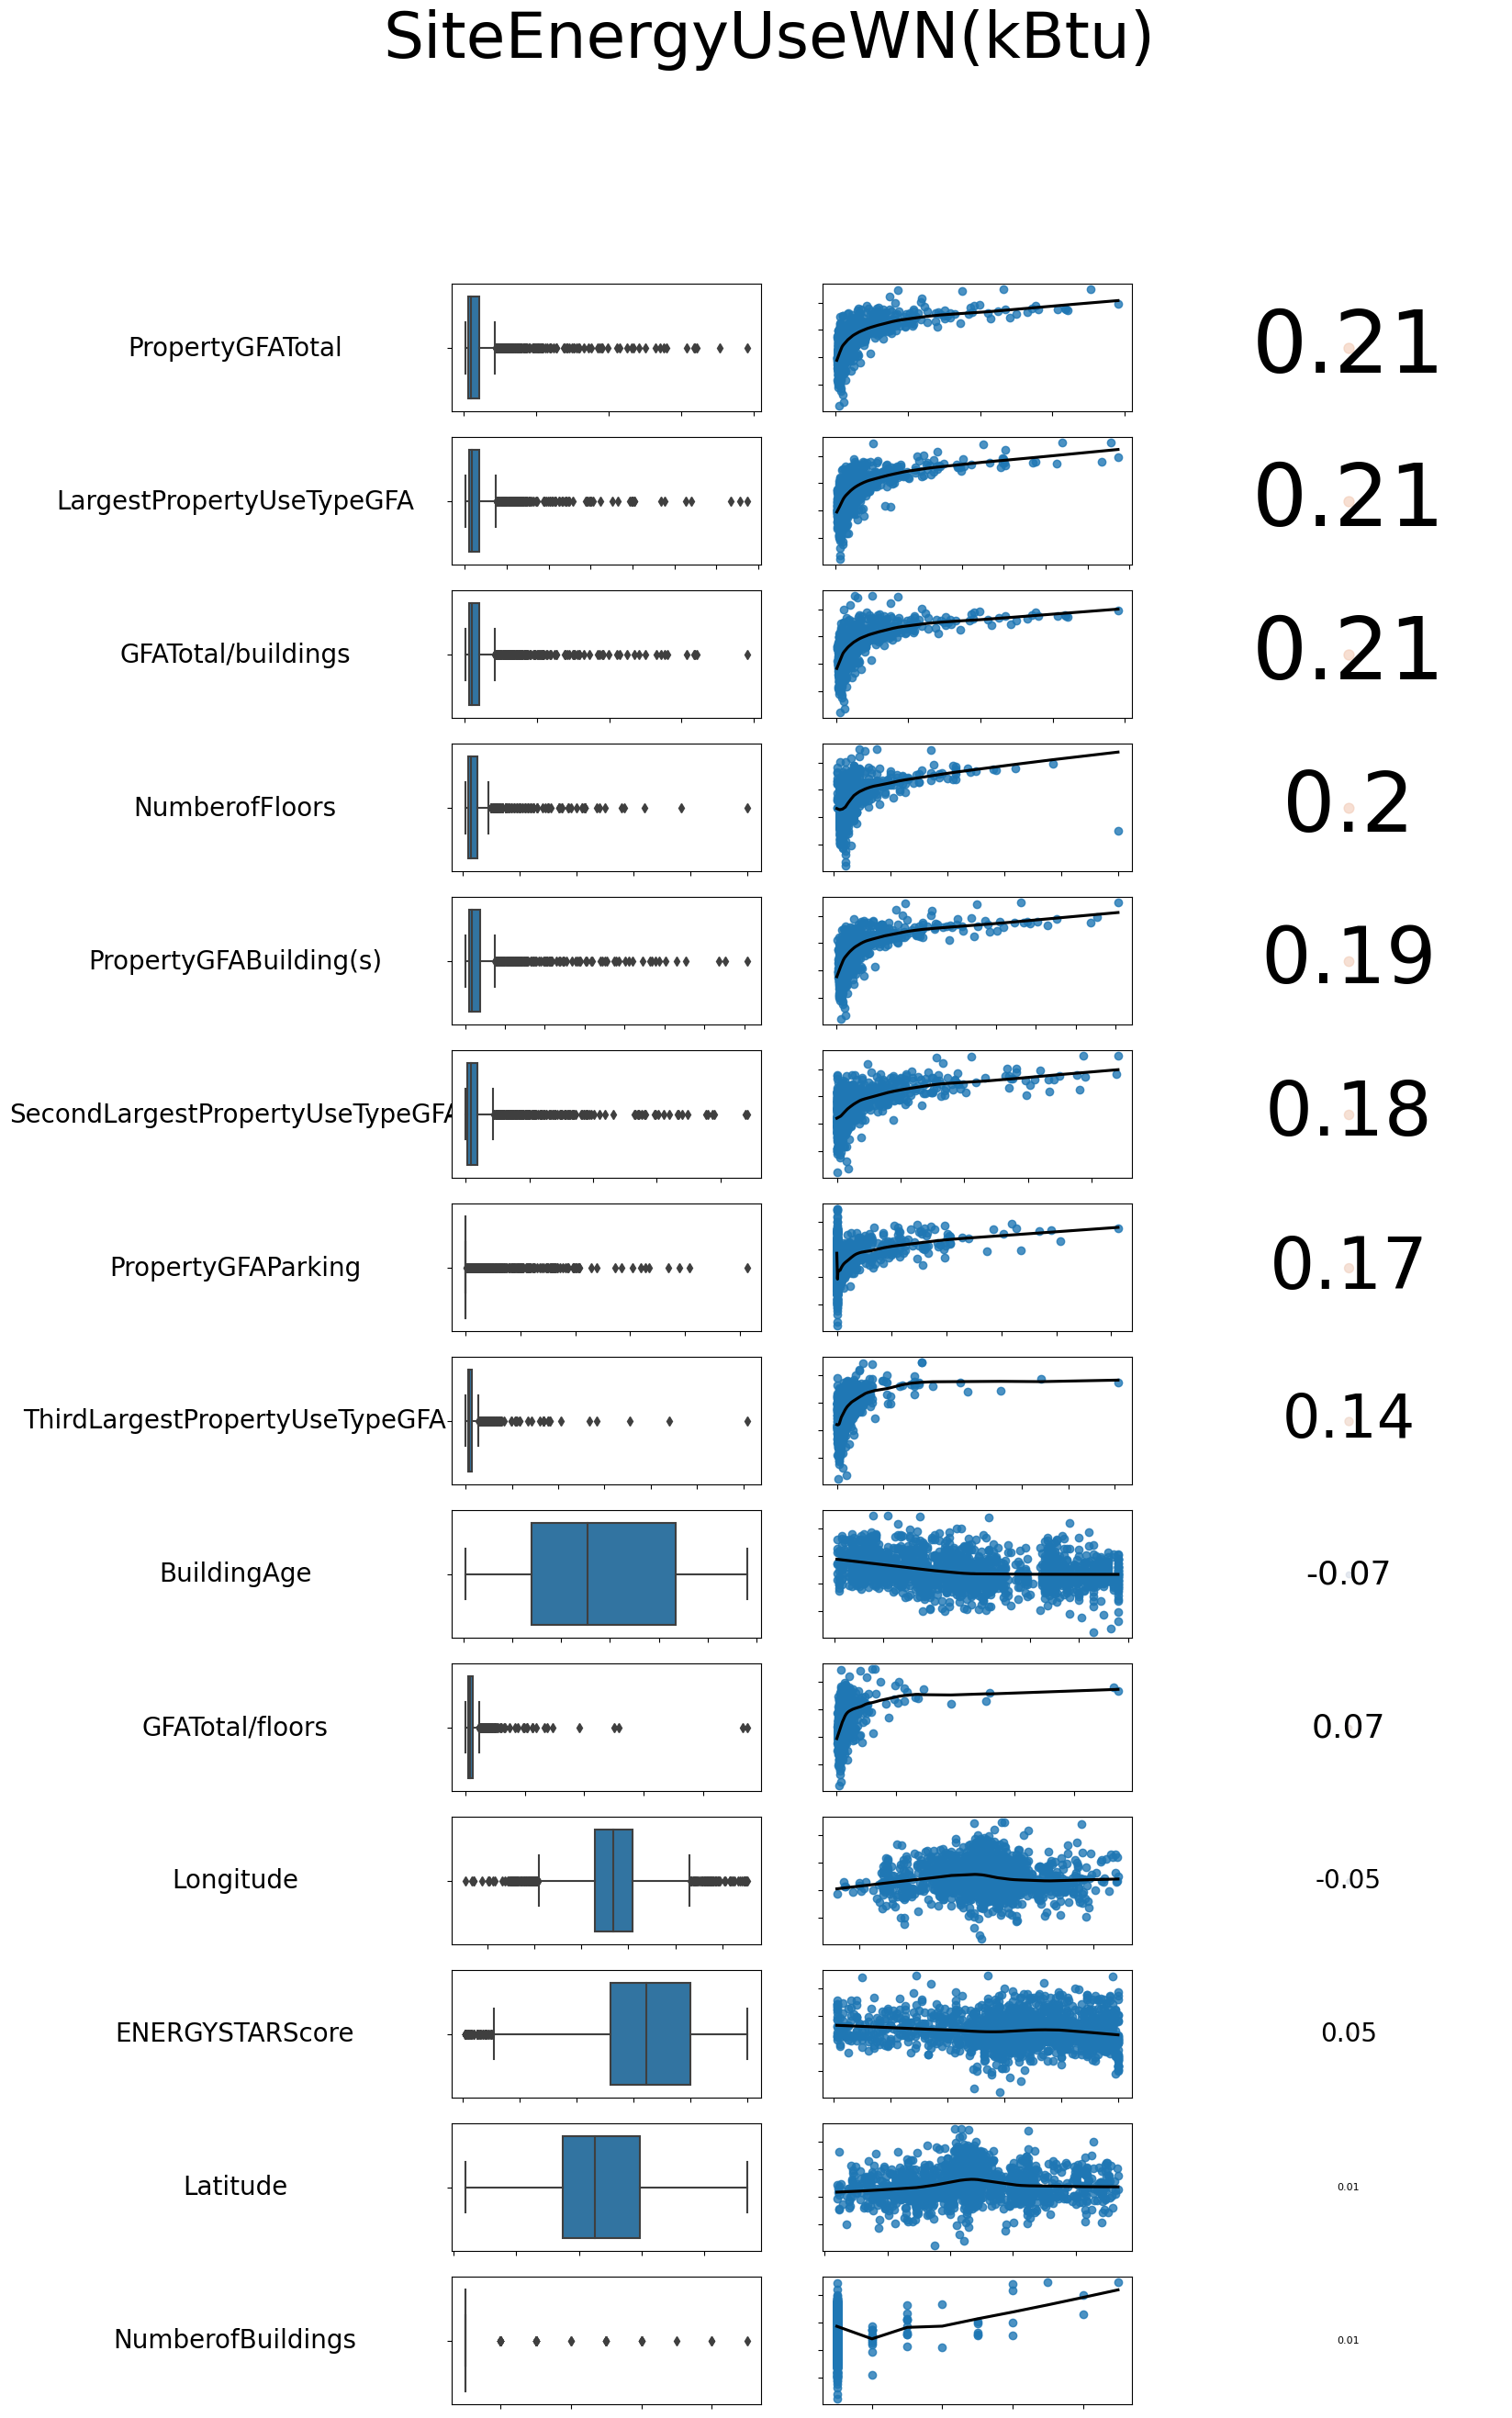

In [68]:
explorationGridCont(X.filter(numerical_columns),np.log10(1+Ys.iloc[:,0]), fontsizeY= 50, fontsizeX = 20,fontsize = 300)

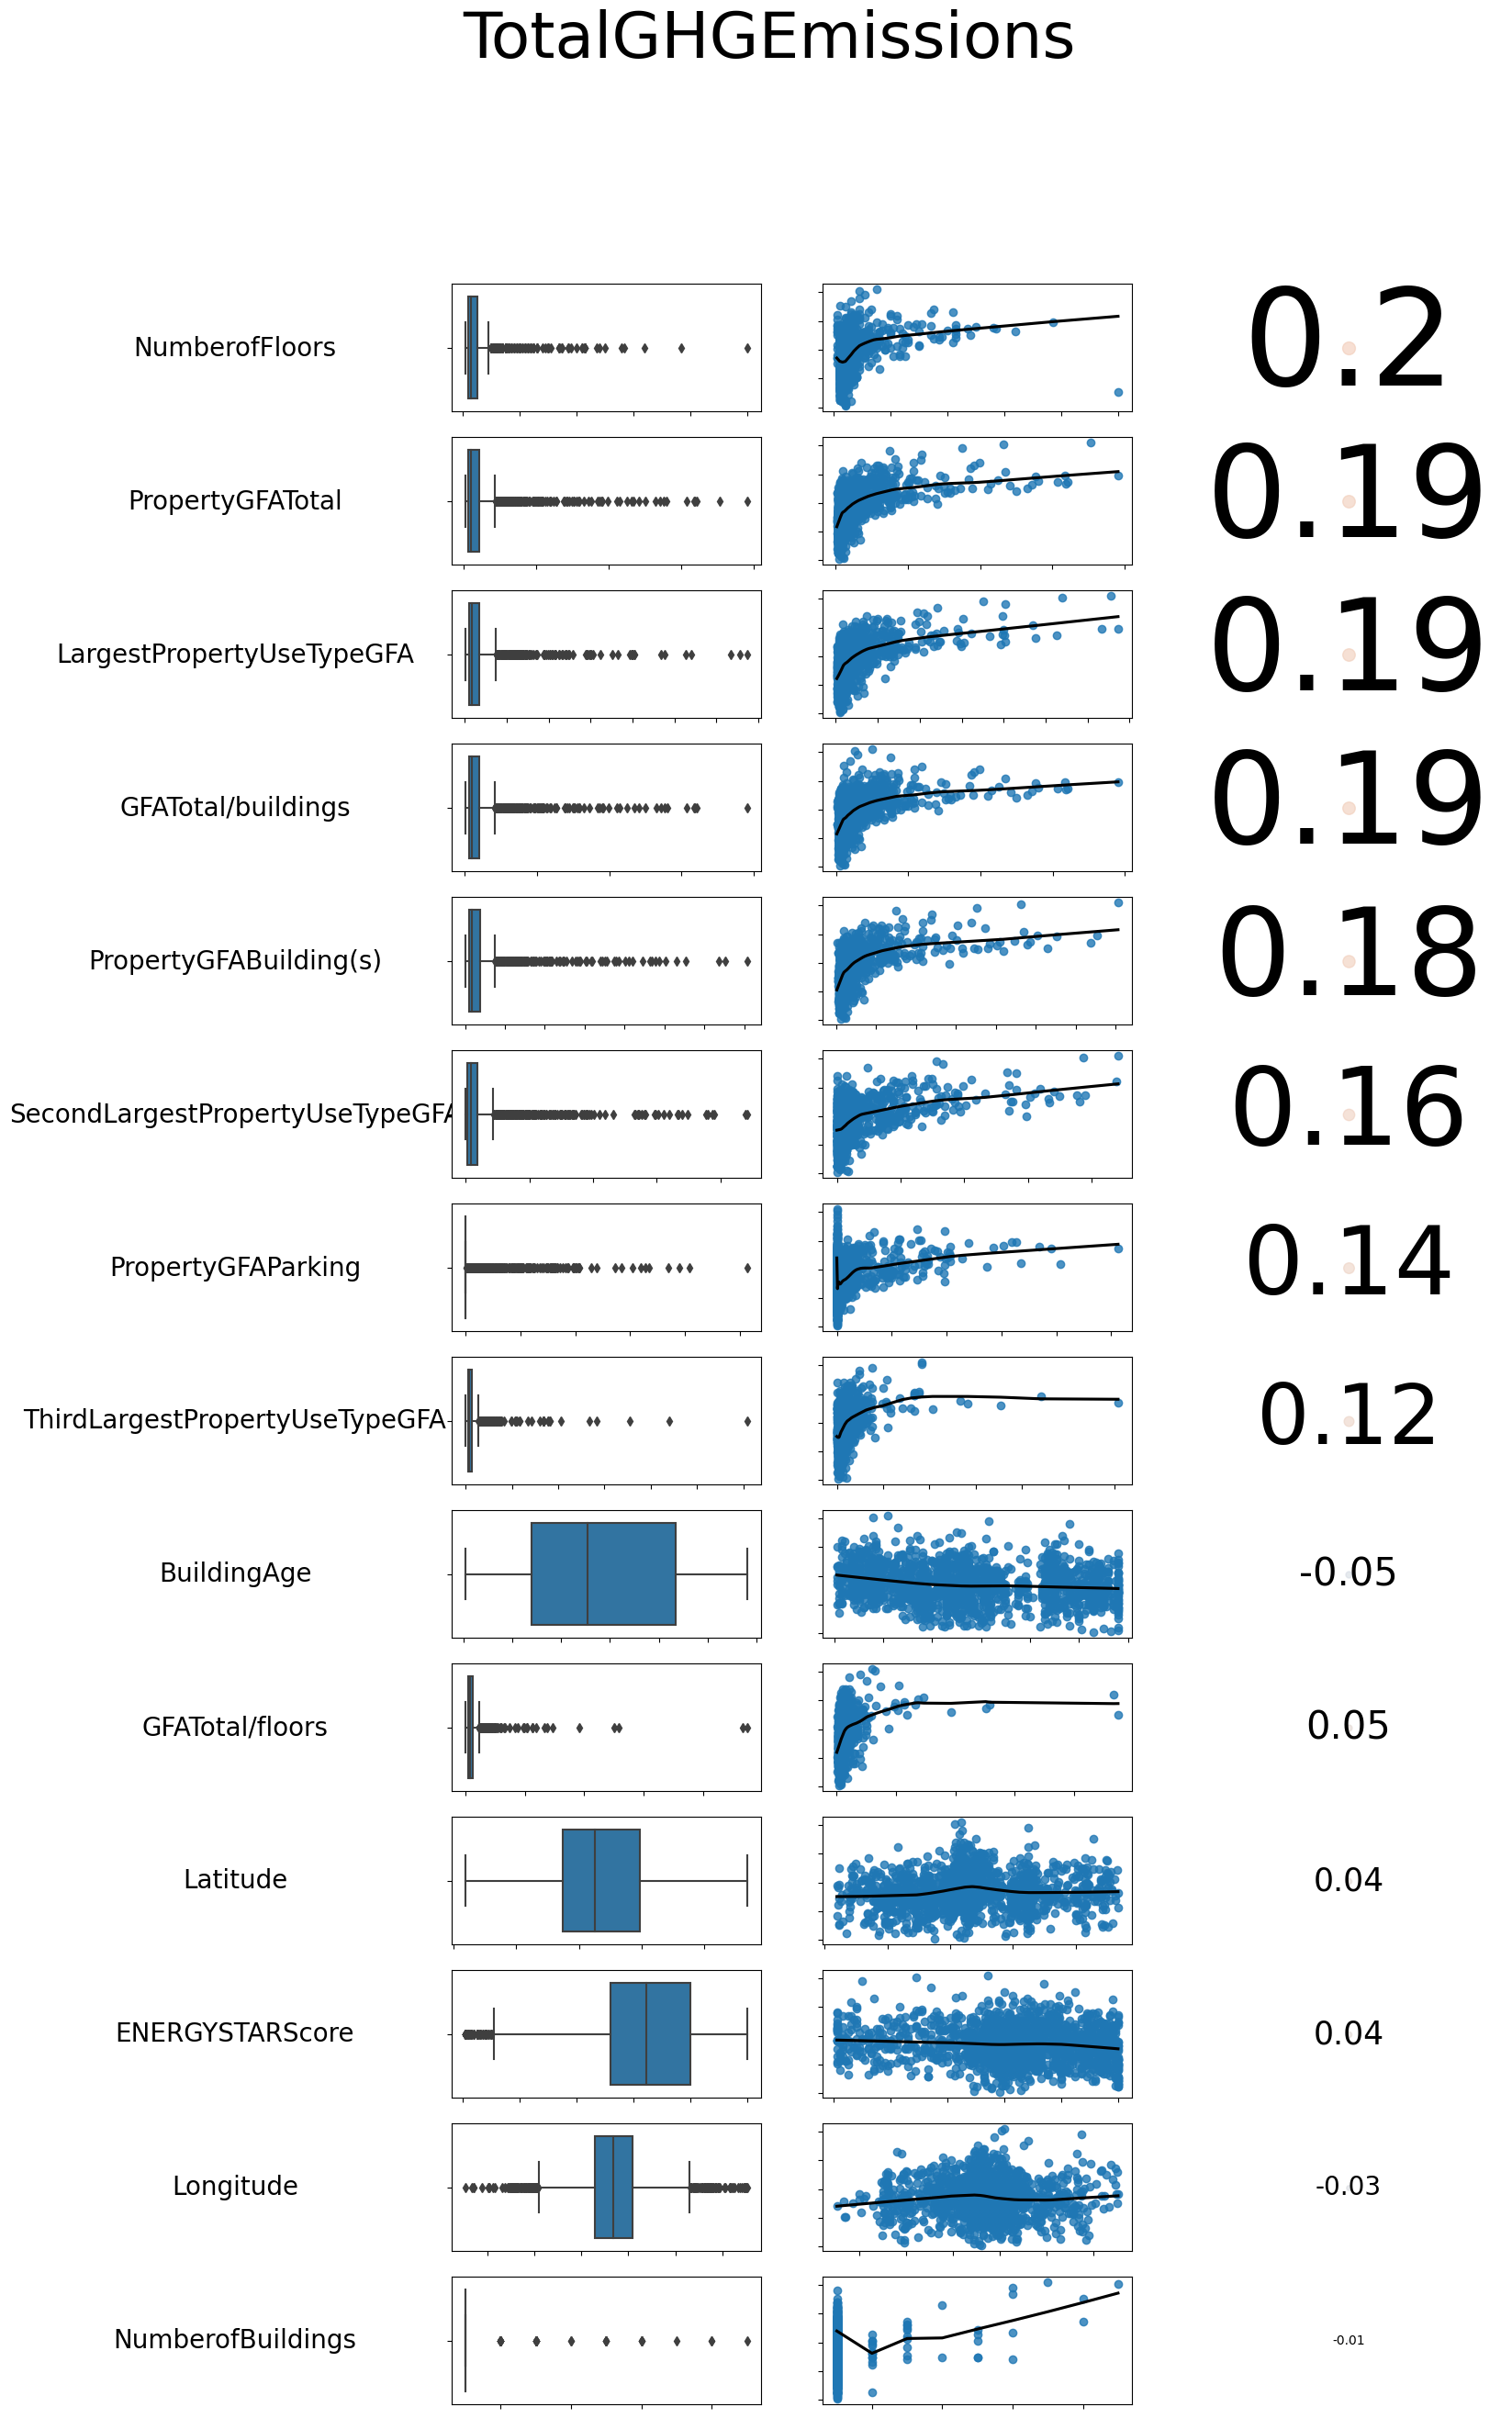

In [69]:
explorationGridCont(X.filter(numerical_columns),np.log10(1+Ys.iloc[:,1]), fontsizeY= 50, fontsizeX = 20,fontsize = 500)

On peut constater que les corrélations sont relativement faibles, mais cela est dû au fait que la corrélation teste une relation linéaire. On peut observer à travers un graphique de dispersion que les relations sont souvent de type logarithmique. On va donc conserver toutes les variables numériques car les algorithmes de régressions vont évaluer ces différentes relations polynomiales

## Lien entre Ys et variables catégorielles

In [70]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'Outlier'],
      dtype='object')

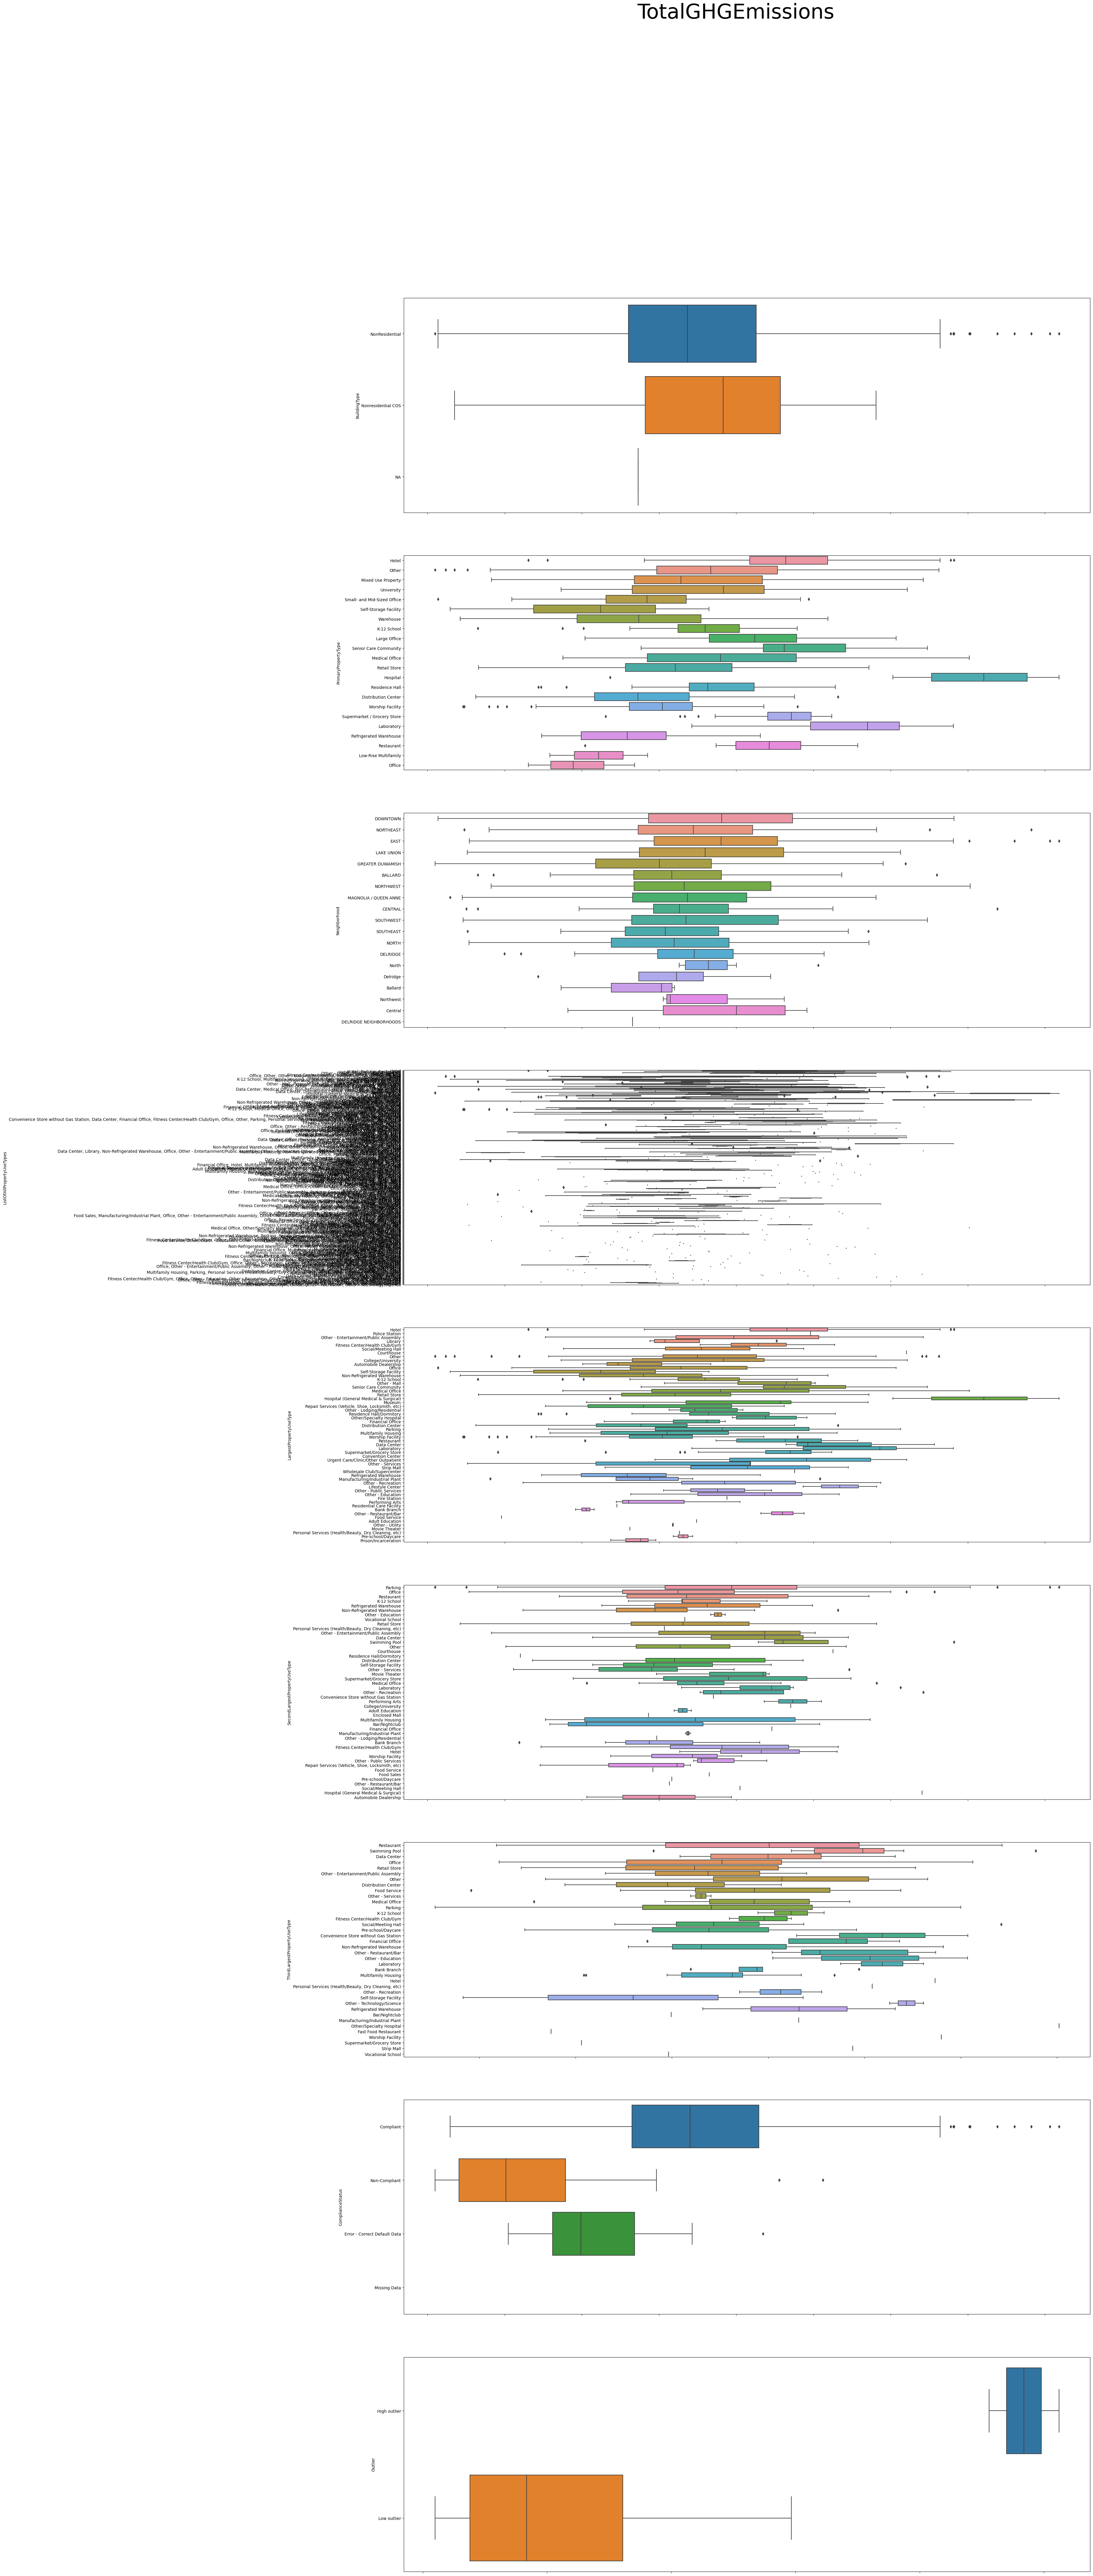

In [71]:
explorationGridCat(X = df2.filter(categorical_columns),
                   y =np.log10(1+Ys.iloc[:,1]), figsize= (30,100))

Au vu des nombreux labels dans certaines variables, nous ne voulons pas effectuer d'analyse de variance (ANOVA) mais plutôt laisser les algorithmes d'apprentissage automatique sélectionner les variables catégorielles les plus pertinentses.

# Sauvegarde des données

In [72]:
import pickle
saveX = open("X.pickle", "wb")
pickle.dump(X, saveX)
saveX.close()

saveY = open("Ys.pickle", "wb")
pickle.dump(Ys, saveY)
saveY.close()